In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import models, layers
keras.__version__

Using TensorFlow backend.


'2.2.0'

In [2]:
df = pd.read_csv("https://github.com/bgweber/Twitch/raw/master/Recommendations/games-expand.csv")
df.to_csv("games.csv", index=False)
df.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,label
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,1,0,0,1,1
4,0,0,1,0,1,1,0,1,1,0,1


In [3]:
train = df[5000:]
test = df[:5000]

print(test.shape)
print(train.shape)

(5000, 11)
(17905, 11)


In [4]:
x = train.drop(['label'], axis=1)
y = train['label']
x.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10
5000,1,1,0,1,1,0,0,0,0,0
5001,0,0,0,0,0,0,1,0,0,0
5002,0,0,0,0,0,0,1,0,0,0
5003,1,0,1,0,0,0,0,0,0,1
5004,0,0,0,0,0,0,0,0,0,0


In [5]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10,)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    keras.backend.get_session().run(tf.local_variables_initializer())
    return auc
    
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=[auc])


In [7]:
history = model.fit(x,
                    y,
                    epochs=100,
                    batch_size=100,
                    validation_split = .2,
                    verbose=0)

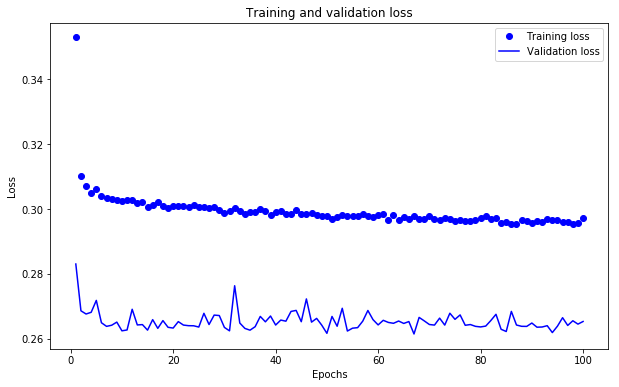

In [8]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10,6)) 
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

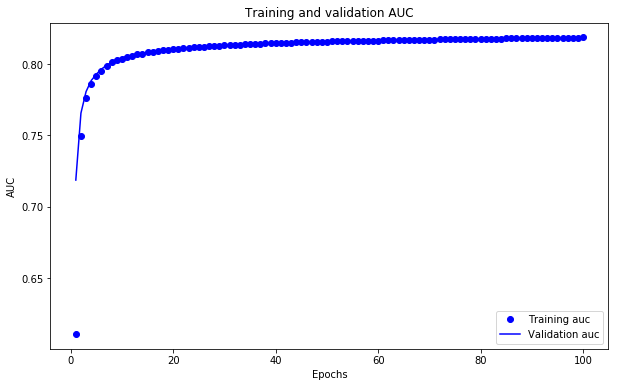

In [9]:
auc = history.history['auc']
val_auc = history.history['val_auc']

plt.figure(figsize=(10,6)) 
plt.plot(epochs, auc, 'bo', label='Training auc')
plt.plot(epochs, val_auc, 'b', label='Validation auc')
plt.title('Training and validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [10]:
x_test = test.drop(['label'], axis=1)
y_test = test['label']

results = model.evaluate(x_test, y_test, verbose = 0)
results

[0.3826543588638306, 0.818610186958313]